In [1]:
from collections import OrderedDict
from typing import List
# import flwr as fl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pathlib
import pandas as pd
from models import autoencoder,AE,D_autoencoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
sns.set()
import sys
import os
sys.path.append('../')
sys.path.append(os.path.abspath(os.path.join("../scr")))


# # DEVICE = torch.device("cpu")
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from flower_utils import train, load_data, test, get_threshold, get_metrics,compute_metrics,plot_cm


### `Loading  preprocessed training and testing datasets`

In [2]:
# upload the tarinloader and validloader for training
file_path='../dataset/DNN-EdgeIIoT_train_normal.csv'
trainloader,valloader,num_examples,trainset,testset=load_data(path=file_path)

Loading IoT dataset....


In [3]:
# upload the testloader of a normal dataset
_,testloader,num_examples,trainset,testset=load_data(path=file_path,testing_type='normal')

Loading IoT dataset....
Getting normal dataset for testing


In [4]:
# upload the testloader of an anomaly dataset
_,testloader_an,num_examples,trainset,testset=load_data(path=file_path,testing_type='anormal')

Loading IoT dataset....
Getting anomaly dataset for testing


### `Centralized training with deoising autoencoder of 128 neurons and botneck of 16 with Tahn function nn.Dropout(0.2)`

In [6]:
# with deoising autoencoder of 128 neurons and botneck of 16 with Tahn function nn.Dropout(0.2)
model=D_autoencoder().to(DEVICE)
history,recon_losses,threshold,False_Pos_train,_,accuracy_train=train(model, trainloader,valloader,n_epochs=50)


Epoch 1: train loss 4.493222478626907 validation loss 1.5875031141074853
Epoch 2: train loss 2.6732571593566234 validation loss 1.3261534477999015
Epoch 3: train loss 2.3819660896613297 validation loss 1.182306685329628
Epoch 4: train loss 2.2148202331468934 validation loss 1.0697714043207083
Epoch 5: train loss 2.0794701517163494 validation loss 0.8485621009863251
Epoch 6: train loss 1.926829719345552 validation loss 0.8149674789976382
Epoch 7: train loss 1.829699195227296 validation loss 0.7189201406946639
Epoch 8: train loss 1.7341352495167168 validation loss 0.6090954732711452
Epoch 9: train loss 1.6632263036878443 validation loss 0.64333867668712
Epoch 10: train loss 1.6143571966497616 validation loss 0.5783958951270491
Epoch 11: train loss 1.5645952388291895 validation loss 0.4826691528368106
Epoch 12: train loss 1.5004958582676349 validation loss 0.5505686536610997
Epoch 13: train loss 1.4639720771475484 validation loss 0.48063947452006156
Epoch 14: train loss 1.4356276922047169

In [104]:
# training acuracy for detecting normal network traffic
accuracy_train

0.9918899348298335

In [5]:
# # with 256 neuron and botneck of 9 with sigmoid
# model=autoencoder().to(DEVICE)
# history_train3,threshold3,False_Pos3,False_Pos_rate3,accuracy_train3=train(model, trainloader,valloader,n_epochs=5)

Epoch 1: train loss 20.565184126791856 validation loss 18.01590320886722
Epoch 2: train loss 28.43706955095836 validation loss 27.866538572701693
Epoch 3: train loss 28.2604478076246 validation loss 24.95462221459322
Epoch 4: train loss 25.25220281016482 validation loss 31.782271215957888
Epoch 5: train loss 31.740753151797414 validation loss 29.532231300732736
=> saving checkpoint...
save_checkpoint_state Done
Loading the checkpoint...
Nomal predictions: 4060/6905


### `centralized testing`

In [101]:
# load a thrained model to be used for testing
# PATH='model.pth'
# model.load_state_dict(torch.load(PATH))
# model.eval()
# get the metrics for normal dataset
threshold, rec_losses_norm,n_features,predicted_norm,accuracy_norm,False_Pos_test=test(
    testloader=testloader,test_type='normal',cid=None)

Loading the checkpoint...
Nomal predictions: 3436/3453


In [102]:
# testing acuracy for detecting normal network traffic
accuracy_norm

0.9950767448595425

In [98]:
# get the metrics for abnormal dataset
_, rec_losses_anorm,_,predicted_an,accuracy_an,False_Neg_test=test(testloader_an,test_type='abnormal')

Loading the checkpoint...
Abnomal predictions: 3453/3453


In [103]:
# testing acuracy for detecting abnormal network traffic
accuracy_an

1.0

In [67]:
False_Pos_test

17

In [16]:
compute_metrics(threshold,rec_losses_anorm, testloader_an,type='abnormal')

Abnomal predictions: 3453/3453


(3453, 1.0, 0)

In [106]:
# computer accuracy of the centralized model
centralized_acc =(predicted_norm + predicted_an)/(predicted_norm + predicted_an + False_Neg_test +False_Pos_test)
centralized_acc

0.9975383724297712

### `Centralized training with deoising autoencoder of 128 neurons and botneck of 16 with Tahn function nn.Dropout(0.2)`

In [ ]:
# with 128 neuron autoencoder  botneck of 18 with tanh activation fn.
model=autoencoder().to(DEVICE)
history_train,threshold1,False_Pos1,False_Pos_rate1,accuracy_train1=train(
    model, trainloader,valloader,n_epochs=50)

Epoch 1: train loss 16.918147292996274 validation loss 14.282842332137541
Epoch 2: train loss 15.422469409372452 validation loss 14.094305438934654
Epoch 3: train loss 14.006692072467926 validation loss 11.20143316319098
Epoch 4: train loss 12.606866006092725 validation loss 11.207450321643678
Epoch 5: train loss 12.477097530121634 validation loss 11.163446076047691
Epoch 6: train loss 12.323779601822531 validation loss 10.481058548994872
Epoch 7: train loss 12.171797855083891 validation loss 10.094255970308533
Epoch 8: train loss 11.865591489158971 validation loss 9.919430837323743
Epoch 9: train loss 11.75190905066073 validation loss 9.976376893099006
Epoch 10: train loss 11.71921366251165 validation loss 10.035072790151629
Epoch 11: train loss 11.60590837236438 validation loss 9.767316040752481
Epoch 12: train loss 11.578564427513003 validation loss 9.596072482149479
Epoch 13: train loss 11.231772428980191 validation loss 7.881778170635918
Epoch 14: train loss 10.452884766904265 val

In [19]:
df_history_mae= pd.DataFrame(history, columns=['train_loss', 'train_valid_loss'])
df_history_mae

,train_loss,train_valid_loss


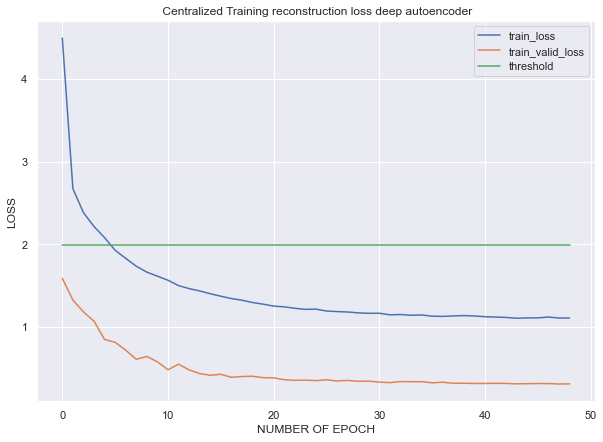

In [156]:
df_history_mae['train_valid_loss']=history['val']
df_history_mae['train_loss']=history['train']
# df=df_history_mae.drop('df_history_mae',axis=1,inplace=True)
df_history_mae['threshold']= threshold
df_history_mae.to_csv('train_128_autoencoder_final.csv', index=False)
# plot the cetralized training grapth
fig= df_history_mae.iloc[:49,:].plot(figsize=(10, 7)).get_figure().savefig('train_final.jpeg')
plt.xlabel('NUMBER OF EPOCH')
plt.ylabel('LOSS')
plt.title(' Centralized Training reconstruction loss deep autoencoder')

plt.show()

In [152]:
               
def plot_cm(TN,TP,FP,FN, name=None):
    ''' A function to plot a Confusion Matrix'''
    confusion_matrix = np.zeros((2,2 ))
    confusion_matrix[0][0]= float(TN* 100)
    confusion_matrix[0][1]= float(FP* 100)
    confusion_matrix[1][0]= float(FN* 100)
    confusion_matrix[1][1]= float(TP* 100)
    df_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
    plt.figure(figsize=(10,7))
    ax=sns.heatmap(df_cm, vmin=df_cm.values.min(), vmax=1,fmt='.2f', square=True, cmap="YlGnBu",
        linewidths=0.1, annot=True, annot_kws={"fontsize":12,"size": 12}) 
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .2, .75, 1])
    cbar.set_ticklabels(['low', '20%', '75%', '100%'])
    if name !=None:
        plt.title(f'Device id_number {name}\'s confusion matrix',fontsize=14,fontstyle='italic')
        plt.savefig(f'devive_{name}_confusion_matrix.jpeg')
    if name ==None:
        plt.title(' Centralized confusion matrix',fontsize=14,fontstyle='italic')
        plt.savefig('Centralized confusion_matrix.jpeg')
    plt.ylabel('True Label',fontsize=14)
    plt.xlabel('Predicted Label',fontsize=14)
    plt.show()

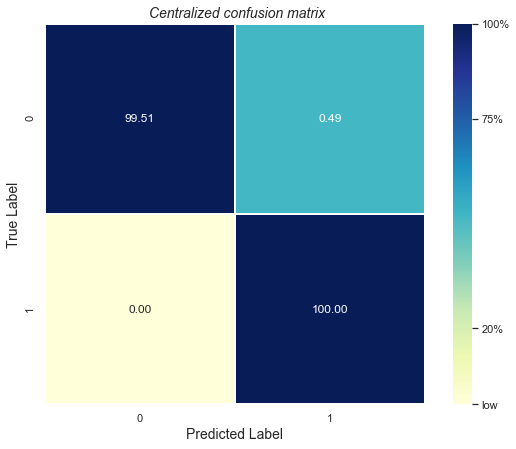

In [153]:
# compute each metrics for centralized
# true negative
TN_values=predicted_norm/(predicted_norm + False_Pos_test) 
# true positive
False_Pos= False_Pos_test/(predicted_norm + False_Pos_test)
# false positive
TP_values=predicted_an/(predicted_an + False_Neg_test)
# false negative
False_Neg= False_Neg_test/(predicted_an + False_Neg_test)  
# plot the confusion matrix
plot_cm(TN_values,TP_values,False_Pos,False_Neg, name=None)

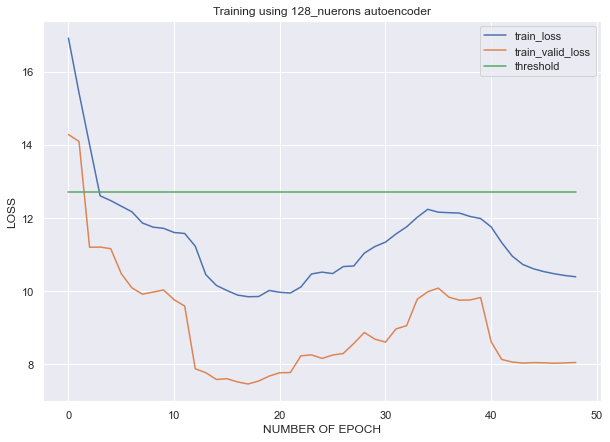

In [35]:
# plot the cetralized training grapth
fig= df_history_mae.iloc[:49,:].plot(figsize=(10, 7)).get_figure().savefig('train')
plt.xlabel('NUMBER OF EPOCH')
plt.ylabel('LOSS')
plt.title('Training using 128_nuerons autoencoder')

plt.show()

In [23]:
pd.read_csv('train_128_autoencoder_final.csv')

,train_loss,train_valid_loss,threshold
0,4.493222,1.587503,1.987483
1,2.673257,1.326153,1.987483
2,2.381966,1.182307,1.987483
3,2.214820,1.069771,1.987483
4,2.079470,0.848562,1.987483
5,1.926830,0.814967,1.987483
6,1.829699,0.718920,1.987483
7,1.734135,0.609095,1.987483
8,1.663226,0.643339,1.987483
9,1.614357,0.578396,1.987483


In [109]:
# compute the metrics for cetralized model
precision, recall,f1_score= get_metrics(predicted_an,False_Pos,False_Neg)
print(f"Acuracy: { centralized_acc:.6f}")
print(f"Precision: {precision :.6f}")
print(f"Recall: {recall :.1f}")
print(f"f1_score: {f1_score :.6f}" )

False_Pos= False_Pos_test/(predicted_norm + False_Pos_test)
print(f"False_Pos_rate: {False_Pos :.6f}" )

Acuracy: 0.997538
Precision: 0.999999
Recall: 1.0
f1_score: 0.999999
False_Pos_rate: 0.004923


## `Federated averaging FedAvg training results ploting.`

- please note that the training of those two devices was done via a terminal
- detailed running  is provided in readme file.

In [ ]:
# predictions, losses,n_features=predict(path,model,pred_type='validate')
save_dir = pathlib.Path("results/_results.json")

In [25]:
# Get the results of client zero
df0_result=pd.read_json('/Users/apple/Desktop/flower/results/0_eval_results.json')
df0_result['false_rate']=df0_result['False_Pos']/df0_result['predicted_norm']
df0_result

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,False_Neg,false_rate
0,0.997683,0.979569,1,0.989679,13772,1726,36,0,0.002614
1,0.997747,0.980125,1,0.989963,13773,1726,35,0,0.002541
2,0.998262,0.984598,1,0.992239,13781,1726,27,0,0.001959
3,0.998519,0.986850,1,0.993381,13785,1726,23,0,0.001668
4,0.998648,0.987979,1,0.993953,13787,1726,21,0,0.001523


In [262]:
# Get the results of client zero
df0_reult=pd.read_json('/Users/apple/Desktop/flower/results/0_eval_results.json')
df0_reult['false_rate']=df0_reult['False_Pos']/df0_reult['predicted_norm']
df0_reult

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,False_Neg,false_rate
0,0.998841,0.989679,1,0.994813,13790,1726,18,0,0.001305
1,0.998970,0.990815,1,0.995386,13792,1726,16,0,0.001160
2,0.999099,0.991954,1,0.995961,13794,1726,14,0,0.001015
3,0.999034,0.991384,1,0.995673,13793,1726,15,0,0.001088
4,0.999034,0.991384,1,0.995673,13793,1726,15,0,0.001088


In [222]:
df0_reult=pd.read_json('/Users/apple/Desktop/flower/results/0_eval_results.json')
df0_reult['false_rate']=df0_reult['False_Pos']/df0_reult['predicted_norm']
df0_reult

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,false_rate
0,0.998004,0.982356,1,0.991100,13777,1726,31,0.002250
1,0.998198,0.984036,1,0.991954,13780,1726,28,0.002032
2,0.997876,0.981239,1,0.990531,13775,1726,33,0.002396
3,0.998262,0.984598,1,0.992239,13781,1726,27,0.001959
4,0.997683,0.979569,1,0.989679,13772,1726,36,0.002614


 Number of TN  99.88702201622249
 Number of TP  100.0
 Number of False_Pos  0.11297798377752027
 Number of False_Neg  0.0


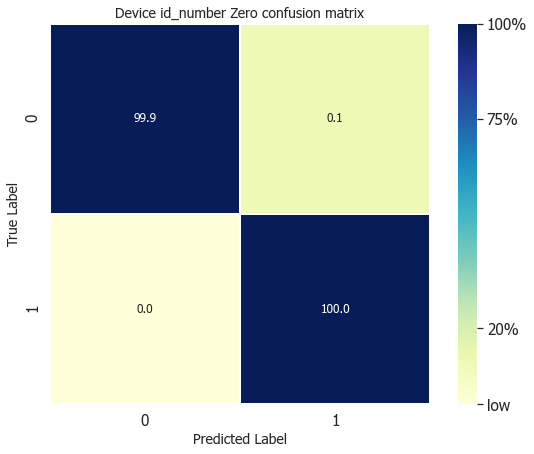

In [359]:
#  PLOT THE CONFUSION MATRIX OF EACH DEVICE
def plot_device_avg_metrics(df_data, device_name):
    avg_TN=df_data['predicted_norm'].mean()/ (df_data['predicted_norm'].mean() + df_data['False_Pos'].mean())
    print(f' Number of TN  {avg_TN * 100}')
    avg_TP=df_data['pred_anorm'].mean()/(df_data['pred_anorm'].mean() + df_data['False_Neg'].mean())
    print(f' Number of TP  {avg_TP * 100}')
    avg_FP=df_data['False_Pos'].mean()/(df_data['predicted_norm'].mean() + df_data['False_Pos'].mean())
    print(f' Number of False_Pos  {avg_FP * 100}')
    avg_FN=df_data['False_Neg'].mean()/(df_data['pred_anorm'].mean() + df_data['False_Neg'].mean())
    print(f' Number of False_Neg  {avg_FN * 100}')
    plot_cm(avg_TN,avg_TP,avg_FP,avg_FN, device_name)

plot_device_avg_metrics(df0_reult,'Zero')
plot_device_avg_metrics(df0_result,'Zero')


 Number of TN  99.79432213209734
 Number of TP  100.0
 Number of False_Pos  0.20567786790266512
 Number of False_Neg  0.0


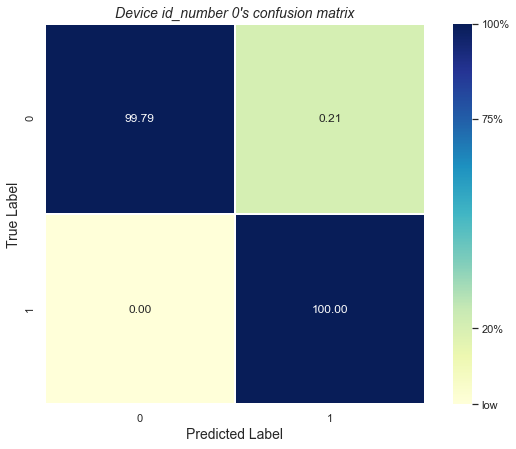

In [86]:
def plot_device_avg_metrics(df_data, device_name):
    '''A helper function for specificaly plot FL matrixes of each device '''
    avg_TN=df_data['predicted_norm'].mean()/ (df_data['predicted_norm'].mean() + df_data['False_Pos'].mean())
    print(f' Number of TN  {avg_TN * 100}')
    avg_TP=df_data['pred_anorm'].mean()/(df_data['pred_anorm'].mean() + df_data['False_Neg'].mean())
    print(f' Number of TP  {avg_TP * 100}')
    avg_FP=df_data['False_Pos'].mean()/(df_data['predicted_norm'].mean() + df_data['False_Pos'].mean())
    print(f' Number of False_Pos  {avg_FP * 100}')
    avg_FN=df_data['False_Neg'].mean()/(df_data['pred_anorm'].mean() + df_data['False_Neg'].mean())
    print(f' Number of False_Neg  {avg_FN * 100}')
    plot_cm(avg_TN,avg_TP,avg_FP,avg_FN, device_name)
plot_device_avg_metrics(df0_result,0)

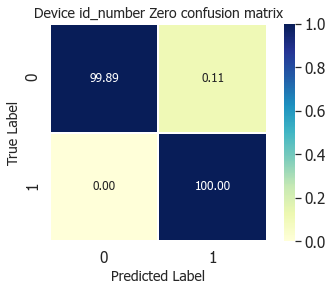

In [329]:
# from flower_utils  import plot_cm
# plot the confusion matrix
# compute the average of TN,TP,FP and FN  for the round trained for.

# avg_TN=df0_reult['predicted_norm'].mean()
# avg_TP=df0_reult['pred_anorm'].mean()
# avg_FP=df0_reult['False_Pos'].mean()
# avg_FN=df0_reult['False_Neg'].mean()

plot_cm(avg_TN,avg_TP,avg_FP,avg_FN, 'Zero')

In [243]:
# the imortant metrics for client with id zero
df=df0_reult[['accuracy', 'precision', 'recall', 'f_measure', 'false_rate']].mean()
# df.to_excel()
df

accuracy      0.998996
precision     0.991043
recall        1.000000
f_measure     0.995501
false_rate    0.001131
dtype: float64

In [244]:
# Get the results of client one
df1_reult=pd.read_json('/Users/apple/Desktop/flower/results/1_eval_results.json')
df1_reult['false_rate']=df1_reult['False_Pos']/df1_reult['predicted_norm']
df1_reult

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,False_Neg,false_rate
0,0.999228,0.993096,1,0.996536,13796,1726,12,0,0.000870
1,0.998970,0.990815,1,0.995386,13792,1726,16,0,0.001160
2,0.999099,0.991954,1,0.995961,13794,1726,14,0,0.001015
3,0.998906,0.990247,1,0.995099,13791,1726,17,0,0.001233
4,0.999099,0.991954,1,0.995961,13794,1726,14,0,0.001015


In [220]:
# Get the results of client one
# df1_reult=pd.read_json('/Users/apple/Desktop/flower/results/1_eval_results.json')
# df1_reult=pd.read_json('../results/1_eval_results.json')
df1_reult['false_rate']=df1_reult['False_Pos']/df1_reult['predicted_norm']
df1_reult

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,false_rate
0,0.998584,0.987414,1,0.993667,13786,1726,22,0.001596
1,0.999421,0.994813,1,0.997400,13799,1726,9,0.000652
2,0.999228,0.993096,1,0.996536,13796,1726,12,0.000870
3,0.999292,0.993667,1,0.996824,13797,1726,11,0.000797
4,0.999228,0.993096,1,0.996536,13796,1726,12,0.000870


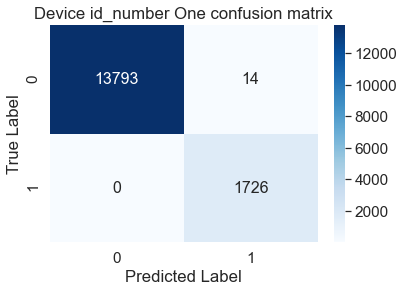

In [275]:
# compute the average of TN,TP,FP and FN  for the round trained for.
avg_TN=df1_reult['predicted_norm'].mean()
avg_TP=df1_reult['pred_anorm'].mean()
avg_FP=df1_reult['False_Pos'].mean()
avg_FN=df1_reult['False_Neg'].mean()

plot_cm(avg_TN,avg_TP,avg_FP,avg_FN, 'One')

In [87]:
# Get the results of client one
df1_result=pd.read_json('../results/1_eval_results.json')
df1_result['false_rate']=df1_result['False_Pos']/df1_result['predicted_norm']
df1_result

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,False_Neg,false_rate
0,0.998648,0.987979,1,0.993953,13787,1726,21,0,0.001523
1,0.998777,0.989112,1,0.994526,13789,1726,19,0,0.001378
2,0.998713,0.988545,1,0.994240,13788,1726,20,0,0.001451
3,0.999034,0.991384,1,0.995673,13793,1726,15,0,0.001088
4,0.998970,0.990815,1,0.995386,13792,1726,16,0,0.001160


 Number of TN  99.86819235225956
 Number of TP  100.0
 Number of False_Pos  0.13180764774044032
 Number of False_Neg  0.0


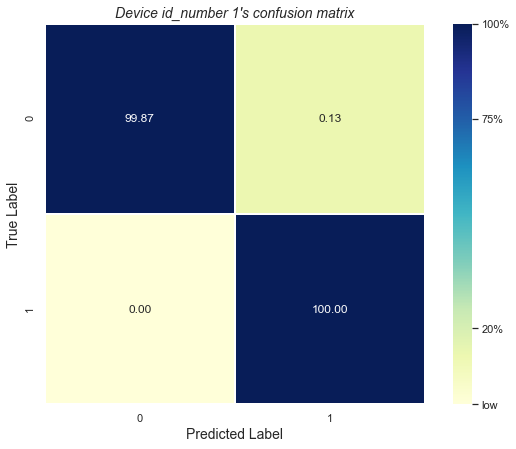

In [88]:
plot_device_avg_metrics(df1_result,1)

 Number of TN  99.89426419466976
 Number of TP  100.0
 Number of False_Pos  0.10573580533024335
 Number of False_Neg  0.0


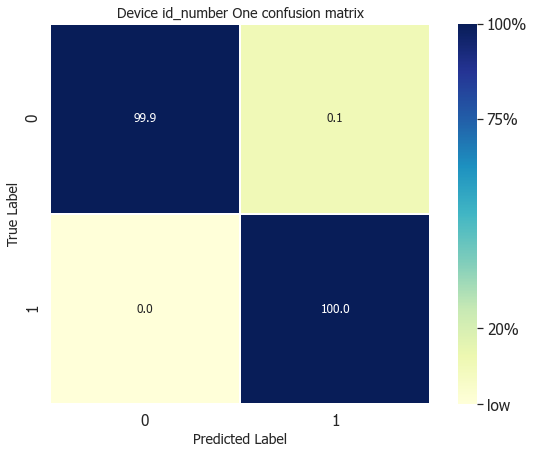

In [360]:
plot_device_avg_metrics(df1_result,1)

In [89]:
# get the averaged metrics for Device 1 over five rounds
df1=df1_result[['accuracy', 'precision', 'recall', 'f_measure', 'false_rate']].mean()
df1

accuracy      0.998828
precision     0.989567
recall        1.000000
f_measure     0.994756
false_rate    0.001320
dtype: float64

In [93]:
df0_result

,accuracy,precision,recall,f_measure,predicted_norm,pred_anorm,False_Pos,False_Neg,false_rate
0,0.997683,0.979569,1,0.989679,13772,1726,36,0,0.002614
1,0.997747,0.980125,1,0.989963,13773,1726,35,0,0.002541
2,0.998262,0.984598,1,0.992239,13781,1726,27,0,0.001959
3,0.998519,0.986850,1,0.993381,13785,1726,23,0,0.001668
4,0.998648,0.987979,1,0.993953,13787,1726,21,0,0.001523


In [91]:
# get the averaged metrics for Device 0 over five rounds
df0=df0_result[['accuracy', 'precision', 'recall', 'f_measure', 'false_rate']].mean()
df0

accuracy      0.998172
precision     0.983824
recall        1.000000
f_measure     0.991843
false_rate    0.002061
dtype: float64

In [92]:
# to do: prepare the dataframe of the two clients and the centralized one

pandas.core.series.Series

In [140]:
pd.read_excel('../metrics.xlsx')

,Unnamed: 0,Federated,Unnamed: 2,Centralize
0,NaN,client 0,client 1,NaN
1,accuracy,0.99897,0.998919,0.99391
2,precision,0.990818,0.990364,0.99300
3,recall,1,1,1.00000
4,f_measure,0.995387,0.995158,0.99300
5,false_rate,0.00116,0.001218,0.01100


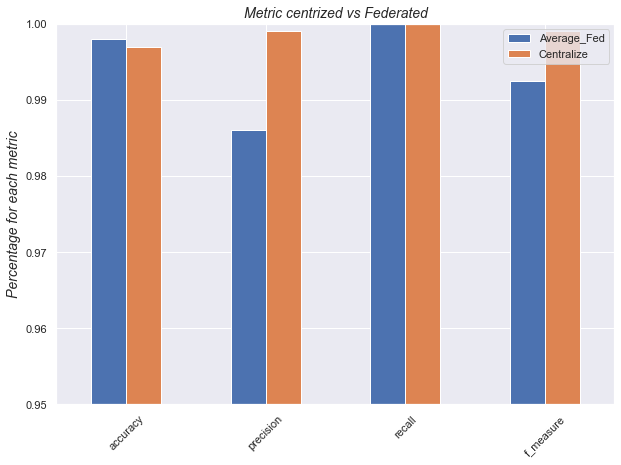

In [157]:
overal_metrics_data={'Average_Fed':[0.998,0.986,1,0.9925,0.00169],
'Centralize': [0.997,0.999,1,0.999,0.004923]}
indixes=['accuracy','precision','recall','f_measure','false_rate']
overal_perf_metris= pd.DataFrame(data=overal_metrics_data,columns=['Average_Fed','Centralize'], index=indixes )
overal_perf_metris.to_csv('Overall Performance metrics.csv')
overal_perf_metris.loc[['accuracy','precision','recall','f_measure']].plot(kind='bar',figsize=(10, 7),
            rot=45, ylim=[0.95,1.0]).get_figure().savefig('train_final.jpeg')
plt.title('Metric centrized vs Federated', fontsize=14,fontstyle='italic')
plt.ylabel('Percentage for each metric',fontsize=14,fontstyle='italic')
plt.show()


<AxesSubplot:>

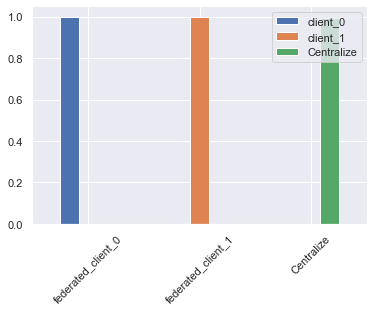

In [186]:
total_accuracy=[{'client_0':0.99897},
	{'client_1':0.998919},
    {'Centralize':0.99391}]
accuracy_data=pd.DataFrame(total_accuracy,index=['federated_client_0','federated_client_1','Centralize']).fillna(0)
# accuracy_data
# total_accuracy1=[0.99897,0.998919,0.99391]
# accuracy_data=pd.DataFrame(total_accuracy1, columns=['score'] ,index=['federated_client_0','federated_client_1','Centralize'])
accuracy_data.plot(kind='bar', rot=45)


In [3]:
pd.read_json('../results/0_results.json')

,dataset,n_samples,fl_round,train_loss,val_loss,norm_test_loss,train_accuracy,False_Positive,False_Positive_rate,threshold
0,13808,13808,1,"[7.015826585749003, 3.658622748424598, 3.27146...","[2.733980654206813, 2.252751107982695, 1.91242...","[1.948876857757568, 0.9834929704666131, 0.9641...",0.998769,17,0.001231,4.553148
1,13808,13808,2,"[2.897352707802144, 2.7720871484068983, 2.6661...","[1.352604542303126, 1.3463994311416991, 1.1563...","[1.8043568134307861, 0.838295102119445, 0.9103...",0.980519,269,0.019481,2.712598
2,13808,13808,3,"[2.797204568166273, 2.799535842377127, 2.64354...","[1.260912065997478, 1.3010152416349081, 1.2593...","[1.71985638141632, 0.807916641235351, 0.808867...",0.981460,256,0.018540,2.672148
3,13808,13808,4,"[2.802896573043159, 2.740613326469171, 2.60273...","[1.334677865791327, 1.206237840639947, 1.14982...","[1.681719779968261, 0.7515403032302851, 0.8352...",0.982619,240,0.017381,2.649889
4,13808,13808,5,"[2.813461425739016, 2.719409104134469, 2.61764...","[1.385973209961989, 1.197801986638012, 1.20797...","[1.662917137145996, 0.830601930618286, 0.85483...",0.980736,266,0.019264,2.646238


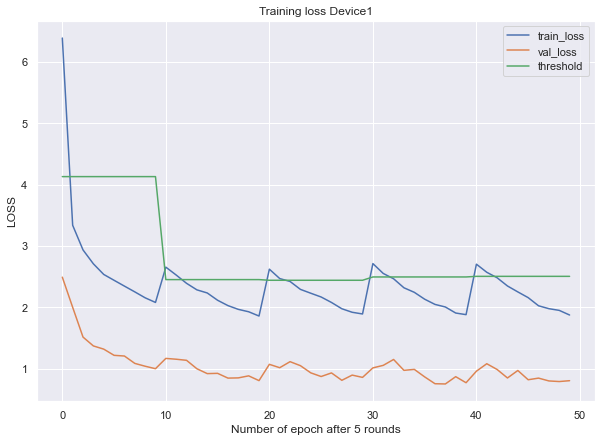

In [150]:
# preporcessing the results of the second client's training results
df_client_1= pd.read_json('../results/1_results.json')
df=df_client_1.explode('train_loss').reset_index(drop=True)
data1=df_client_1[['dataset', 'n_samples', 'fl_round', 'train_loss', 'val_loss', 'train_accuracy', 'False_Positive',
       'False_Positive_rate', 'threshold']]
df1=data1.apply(pd.Series.explode).reset_index(drop=True)
df1[['train_loss','val_loss']]=df1[['train_loss','val_loss']].astype('float64')
df1[['train_loss','val_loss','threshold']].plot(figsize=(10, 7)).get_figure().savefig('train_device1')
# ig= df_history_mae.iloc[:49,:].plot(figsize=(10, 7)).get_figure().savefig('train')
plt.xlabel('Number of epoch after 5 rounds')
plt.ylabel('LOSS')
plt.title('Training loss Device1')

plt.show()
# df1

In [217]:
# use the train loss of client one to calculate number of false positives
df_client_1= pd.read_json('../results/1_results.json')
data_clinet1=df_client_1[[ 'fl_round','norm_test_loss', 'train_accuracy', 'False_Positive','False_Positive_rate',
 'threshold']]
df_client_1=data_clinet1.explode('norm_test_loss').reset_index(drop=True)
df_client_1
int(sum([i >4.004559 for i  in df_client_1['norm_test_loss']])/5)


16

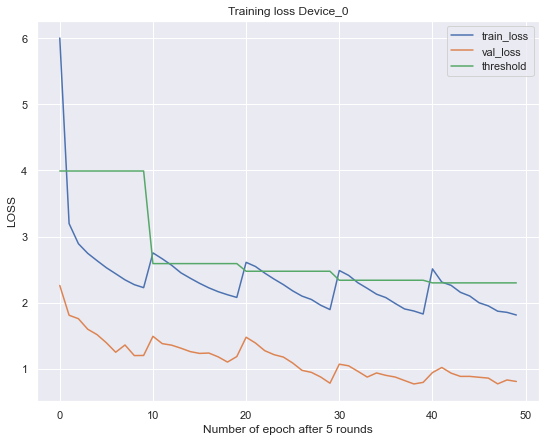

In [154]:
# preporcessing the results of the first client's training results
df_client_0= pd.read_json('../results/0_results.json')
df=df_client_0.explode('train_loss').reset_index(drop=True)
data=df_client_0[['dataset', 'n_samples', 'fl_round', 'train_loss', 'val_loss', 'train_accuracy', 'False_Positive',
       'False_Positive_rate', 'threshold']]
df0=data.apply(pd.Series.explode).reset_index(drop=True)
df0[['train_loss','val_loss']]=df0[['train_loss','val_loss']].astype('float64')
# df0[['train_loss','val_loss','threshold']].plot()
df0[['train_loss','val_loss','threshold']].plot(figsize=(9, 7)).get_figure().savefig('train_device0')
# ig= df_history_mae.iloc[:49,:].plot(figsize=(10, 7)).get_figure().savefig('train')
plt.xlabel('Number of epoch after 5 rounds')
plt.ylabel('LOSS')
plt.title('Training loss Device_0')

plt.show()


In [218]:
# use the train loss of client one to calculate number of false positives
df_client_0= pd.read_json('../results/0_results.json')
data_clinet_0=df_client_0[[ 'fl_round','norm_test_loss', 'train_accuracy', 'False_Positive','False_Positive_rate',
 'threshold']]
df_client_0=data_clinet_0.explode('norm_test_loss').reset_index(drop=True)
df_client_0
int(sum([i > 4.553148  for i  in df_client_0['norm_test_loss']])/5)

16

In [5]:
import json
train_step_number = []
train_loss = []
val_loss=[]
# fedbn_step_number = []
# fedbn_loss = []
def get_evaluation_numbers(n):
    """Open the json files to get the evaluation results."""
   
    with open(f"results/{n}_results.json") as train_file:
        train_loss_list = json.load(train_file)
        print(train_loss_list)
    # with open("results/SVHN_fedbn_results.json") as fedbn_file:
    #     fedbn_list = json.load(fedbn_file)
    for item in train_loss_list:
        if "train_loss" in item:
            train_step_number.append(item["fl_round"])
            train_loss.append(item["train_loss"])
            val_loss.append(item['val_loss'])
    # for item in fedbn_list:
    #     if "train_loss" in item:
    #         fedbn_step_number.append(item["fl_round"])
    #         fedbn_loss.append(item["train_loss"])
def main(n):
    """Plot evaluation results."""
    get_evaluation_numbers(n)
    # pylint: disable= unused-variable, invalid-name
    fig, ax = plt.subplots()
    traing = ax.plot(train_step_number, train_loss, label="train_loss")
    validation = ax.plot(train_step_number, val_loss, label="val_loss")
    ax.legend()
    # plt.axis([ 0.1, 2.5])
    plt.ylabel("Training loss")
    plt.xlabel("Number of FL round")
    plt.title("Training loss ")
    plt.savefig("Training_loss_federated.png")

In [10]:

with open(f"results/{0}_results.json") as train_file:
        train_loss_list = json.load(train_file)
        print(len(train_loss_list[0]['train_loss']))

10


In [14]:
get_evaluation_numbers(0)
print(train_step_number)

print(train_loss )
val_loss

[{'dataset': 13808, 'fl_round': 1, 'train_loss': [0.9687642446713175, 0.18754462237258873], 'val_loss': [0.10879907991547194, 0.0726362121609004], 'train_accuracy': 0.00014484356894553882, 'norm_pred': 2, 'False_Positive': 0, 'False_Positive_rate': 0.0}, {'dataset': 13808, 'fl_round': 2, 'train_loss': [0.12069013122785383, 0.08071218968226347], 'val_loss': [0.06627155509510273, 0.04196398693062948], 'train_accuracy': 0.00014484356894553882, 'norm_pred': 2, 'False_Positive': 0, 'False_Positive_rate': 0.0}]
[1, 2]
[[0.9687642446713175, 0.18754462237258873], [0.12069013122785383, 0.08071218968226347]]


[[0.10879907991547194, 0.0726362121609004],
 [0.06627155509510273, 0.04196398693062948]]

In [219]:
cid_n=1
f'data/partitions/{cid_n}/checkpoint1.pth.tar'

'data/partitions/1/checkpoint1.pth.tar'